In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset,random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

In [2]:
BATCH_SIZE = 64
NUM_CLASSES = 10
LEARNING_RATE = 0.001
EPOCHS_NUM = 10

In [3]:
device = torch.device('cpu')
augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=15),  # Random rotation
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),  # Random cropping
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

In [4]:
# Create Training dataset (use your custom dataset path)
dataset = ImageFolder(root='C:/Diploma/classification_dataset', transform=augmentation_transforms)

# Calculate train-test split sizes (85% train, 15% test)
train_size = int(0.85 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset into training and testing subsets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Apply test transforms to the test dataset
test_dataset.dataset.transform = test_transforms  # Update transform for the test dataset

# Define batch size

# Create DataLoaders for training and testing
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Example of checking dataset details
print(f"Classes: {dataset.classes}")
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Classes: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']
Total samples: 27153
Training samples: 23080
Testing samples: 4073



Displaying first 10 samples from Training Dataset:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.26092..2.7537313].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5580431..1.9928299].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1043313..2.4415667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2019196..2.2464638].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5529135..1.3316082].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2412531..1.4673026].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0839186.

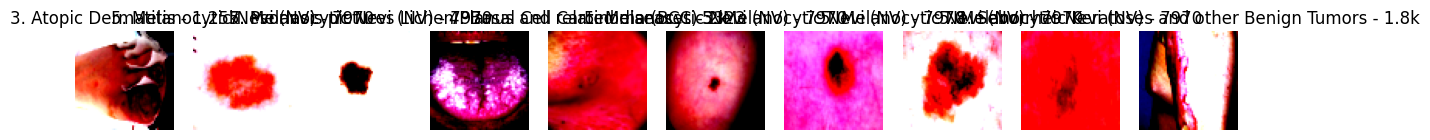

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2382442..1.5836121].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.398588..1.9342991].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.142919..2.1098917].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1496612..2.2269535].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.148327..2.4753182].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7386108..1.6611518].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.257911..1


Displaying first 10 samples from Testing Dataset:


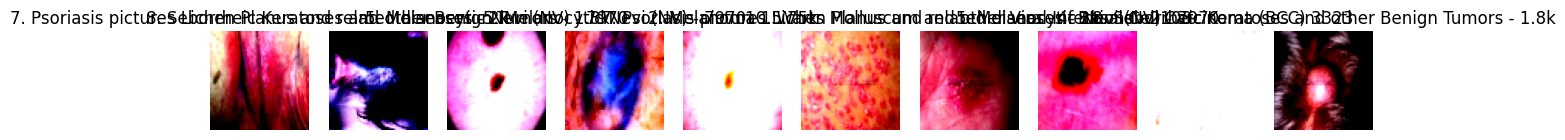

In [5]:
import matplotlib.pyplot as plt

# Display first 10 images from the training dataset
print("\nDisplaying first 10 samples from Training Dataset:")
plt.figure(figsize=(15, 5))  # Set figure size

for i in range(10):
    image, label = train_dataset[i]  # Access the image and label
    class_name = train_dataset.dataset.classes[label]  # Get the class name
    
    # Add subplot for the current sample
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
    plt.title(class_name)
    plt.axis('off')  # Hide axes

plt.show()  # Show training dataset images

# Display first 10 images from the testing dataset
print("\nDisplaying first 10 samples from Testing Dataset:")
plt.figure(figsize=(15, 5))  # Set figure size

for i in range(10):
    image, label = test_dataset[i]  # Access the image and label
    class_name = test_dataset.dataset.classes[label]  # Get the class name
    
    # Add subplot for the current sample
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
    plt.title(class_name)
    plt.axis('off')  # Hide axes

plt.show()  # Show testing dataset images

In [7]:
from NN_class import ConvNeuralNet

model = ConvNeuralNet(NUM_CLASSES)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [8]:
# We use the pre-defined number of epochs to determine how many iterations to train the network on
for epoch in range(EPOCHS_NUM):
# Load in the data in batches using the train_loader object
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, EPOCHS_NUM, loss.item()))

Epoch [1/10], Loss: 1.0795
Epoch [2/10], Loss: 1.1872
Epoch [3/10], Loss: 1.1985
Epoch [4/10], Loss: 1.3177
Epoch [5/10], Loss: 1.0846
Epoch [6/10], Loss: 0.7398
Epoch [7/10], Loss: 0.8810
Epoch [8/10], Loss: 1.0333
Epoch [9/10], Loss: 0.9544
Epoch [10/10], Loss: 0.7274


In [9]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(dataset), 100 * correct / total))

Accuracy of the network on the 27153 train images: 66.87608318890814 %


In [10]:
torch.save(model.state_dict(), "classification_model.pth")
print("Model saved as 'classification_model.pth'")

Model saved as 'classification_model.pth'


In [12]:
model = ConvNeuralNet(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load("classification_model.pth"))
model.eval()

C:\Users\User\AppData\Local\Temp\ipykernel_77356\3048375035.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("classification_model.pth"))

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)